Observations:
1) Most rides occur in the urban area.
2) The rural area has the fewest rides, but the most expensive.
3) We probably need to incentive more rural drivers as there is a shortage of drivers vs rides requests.

In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



In [3]:
print(city_data_df)

print(ride_data_df)


                     city  driver_count      type
0             Richardfort            38     Urban
1            Williamsstad            59     Urban
2             Port Angela            67     Urban
3              Rodneyfort            34     Urban
4             West Robert            39     Urban
5            West Anthony            70     Urban
6             West Angela            48     Urban
7           Martinezhaven            25     Urban
8               Karenberg            22     Urban
9             Barajasview            26     Urban
10             Robertport            12     Urban
11           Joneschester            39     Urban
12                Leahton            17     Urban
13   West Christopherberg            32     Urban
14                Johnton            27     Urban
15           Reynoldsfurt            67     Urban
16             Port David             7     Urban
17    New Kimberlyborough            33     Urban
18            Carriemouth            52     Urban


In [4]:
# Combine the data into a single dataset

combined_df = pd.merge(ride_data_df, city_data_df, on='city', how='outer')
# Display the data table for preview
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

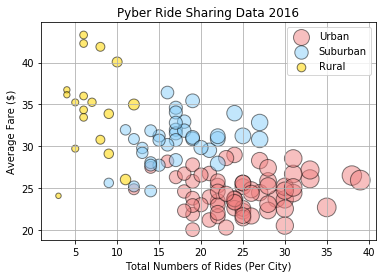

In [5]:
# Obtain the x and y coordinates for each of the three city types
fig, ax = plt.subplots()
urban = combined_df.loc[(combined_df["type"] == "Urban")]
suburban = combined_df.loc[(combined_df["type"] == "Suburban")]
rural = combined_df.loc[(combined_df["type"] == "Rural")]

avg_fare_urban_city = urban.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban_city = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural_city = rural.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types

plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Incorporate the other graph properties
ax.grid()
# Chart title
plt.title("Pyber Ride Sharing Data 2016")
# x label
plt.xlabel("Total Numbers of Rides (Per City)")
# y label
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc='upper right')

# Save Figure
plt.savefig("Pyber Ride Sharing.png")
plt.show()

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

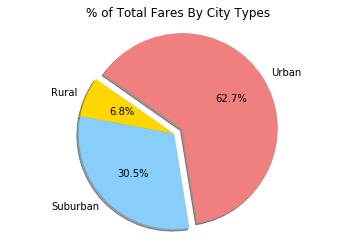

In [7]:
# Calculate Type Percents
total_fare = combined_df.groupby(['type'])['fare'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")

# Build Pie Chart
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=145)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Fares By City Types.png")
plt.show()

## Total Rides by City Type

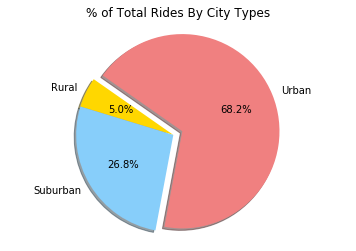

In [8]:
# Calculate Type Percents
total_rides  = combined_df.groupby(['type'])['ride_id'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")

# Build Pie Chart
plt.pie(total_rides , explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=145)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Rides By City Types.png")
plt.show()


## Total Drivers by City Type

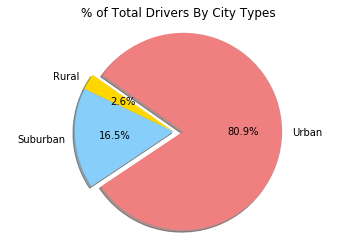

In [9]:
# Calculate Type Percents
total_drivers  = city_data_df.groupby(['type'])['driver_count'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")

# Build Pie Chart
plt.pie(total_drivers , explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=145)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Drivers By City Types.png")
plt.show()